Schematic for our simple circuit

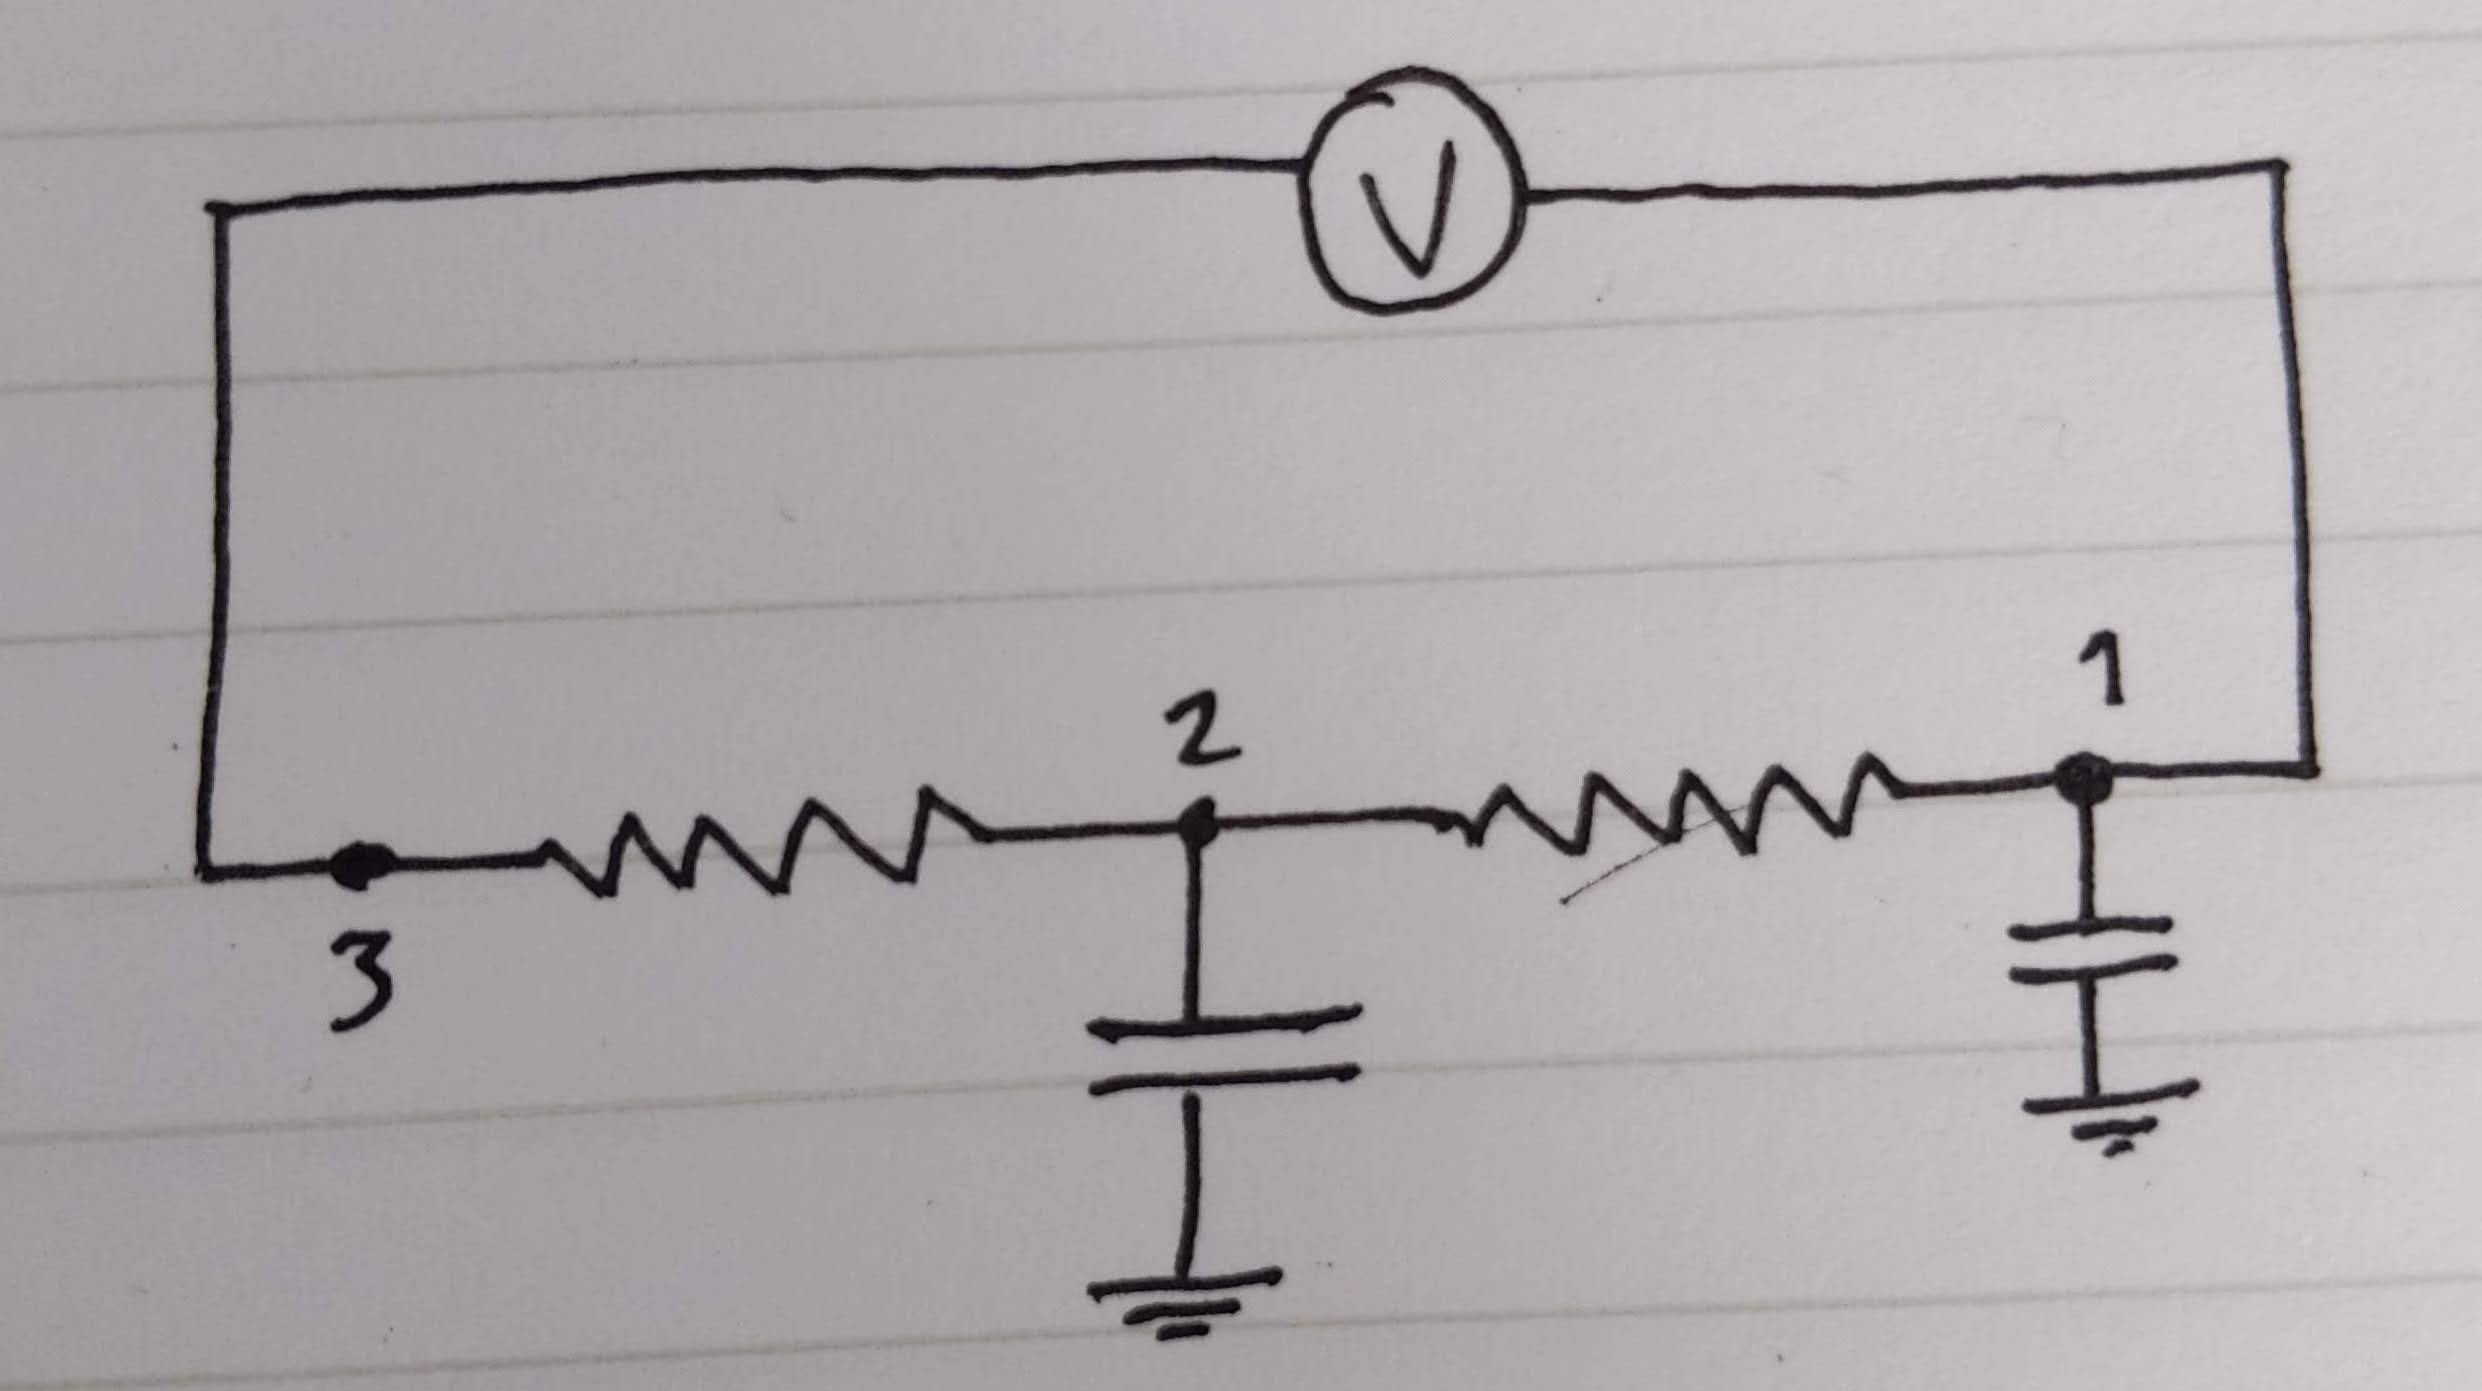

In [1]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
import matplotlib.pyplot as plt
from PySpice.Probe.Plot import plot

In [2]:
## Snippets
# circuit.V('input', 1, circuit.gnd, 10@u_V) # For constant DC supply
# ac_line = circuit.AcLine('input', 1, circuit.gnd, rms_voltage=10@u_V, frequency=5@u_Hz) # Sinusoidal AC supply
# circuit.I('input', 1, circuit.gnd, 1@u_A) # For constant current source

In [80]:
circuit = Circuit('test')

### Voltage source
pulse_line = circuit.PulseVoltageSource('input', 1, circuit.gnd, initial_value=0, pulsed_value=10@u_V, pulse_width=0.5@u_s, period=5@u_s) # Pulsed supply

### Current source
# pulse_line = circuit.PulseCurrentSource('input', 1, 2, initial_value=0.5@u_A, pulsed_value=1@u_A, pulse_width=0.5@u_s, period=5@u_ms) # Pulsed supply

# Is this set up correct? Can we display a diagram
circuit.R(1, 1, 2, 1@u_kΩ) # name, node_plus, node_minus, value@unit
circuit.C(1, 1, circuit.gnd, 300@u_μF)
circuit.R(2, 2, circuit.gnd, 1@u_kΩ)
circuit.C(2, 2, circuit.gnd, 50@u_μF)

Capacitor C2

In [81]:
simulator = circuit.simulator(temperature=25, nominal_temperature=25)

In [82]:
# Current in our circuit. There should be more than one branch, but analysis.branches.values() only has a single entry.
# How does current go to ground if there is a capacitor in between? Surely current is conserved along the branch.

# analysis = simulator.operating_point()
# Why is there 0.00 A through the node? Weird.


In [87]:
analysis = simulator.transient(step_time=pulse_line.period/500, end_time=pulse_line.period)
# for node in analysis.branches.values():
#     print('Node {}: {:5.2f} A'.format(str(node), float(node)))

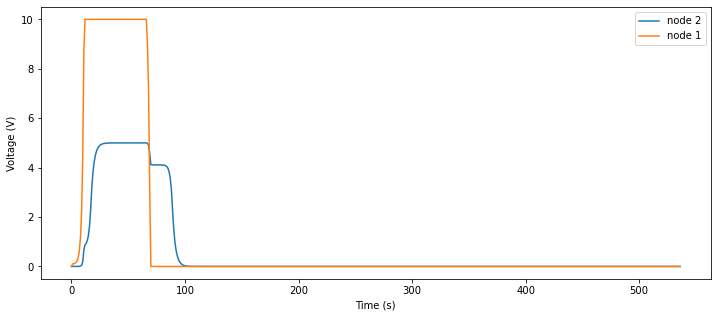

In [88]:
fig, ax = plt.subplots(1,1, figsize=(12,5))
for node, waveform in analysis.nodes.items():
    ax.plot(waveform, label = 'node {}'.format(node))

ax.legend()
ax.set(xlabel='Time (s)', ylabel='Voltage (V)');

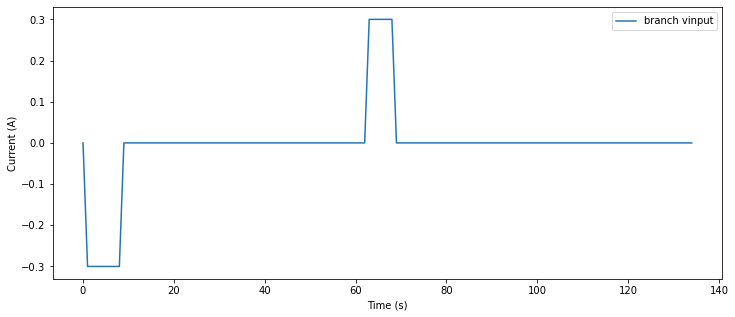

In [49]:
fig, ax = plt.subplots(1,1, figsize=(12,5))
for branch, waveform in analysis.branches.items():
    ax.plot(waveform, label = 'branch {}'.format(branch))
    
ax.legend()
ax.set(xlabel='Time (s)', ylabel='Current (A)');

* Our pusled source represents a simple day/night boiler heating profile. There is some interesting transient behaviour after the boiler switches off, which we need to investigate. Does not seem to be exponential decay...
* step_time in simulator.transient() could be used to capture heat diffusion through walls, as adjacent nodes should be slightly out of phase.

Currently we are looking at the voltage at each node, we want the current instead. I need to

To do:
1. Verify we have the correct circuit set up, perhaps by finding a way to plot a schematic
2. use circuit.PulseCurrentSource to model heat input
3. There should be a different current going through each node (should there? Verify this), but this simulation says otherwise! Diagnose the problem (with 1.)